# Pengerjaan NGC W2

Nama : Maulana Achsan
Batch : 35
Sebagai data scientist di salah satu ibukota di duni, pihak management meminta saya untuk membuatkan model machine learning dengan membuat perkiraan pasien mana yang ada kemungkinan mengalami heart disease. ML ini nantinya akan digunakan sebagai pembantu cardiologist(dokter jantung) untuk mengoptimalkan waktu mereka. Jadi screening awal akan dilakukan komputer (Model ML) dan  selanjutnya akan ada tugas cardiologist untuk memberikan resep dan mungkin tindakan.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import kendalltau, pearsonr
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,OrdinalEncoder
from sklearn.metrics import recall_score


 ## Problem Framing

### Smart Problem Statement

### Specific 

Membuat Model learning untuk memprediksi seseorang mempunyai kemungkinan terserang serangan jantung. 

### Measurement 
Sebelum menentukan Measurement kita simulasi dalam Confusion Matriks supaya lebih paham. 

Confusion Matrix 

Positif = Positif Penyakit Jantung
 
Negatif = Negatif Penyakit Jantung

|                | Predicted Positive  | Predicted Negative |
|----------------|--------------------|--------------------|
| **Actual Positive** | True Positif             | False Negatif                 |
| **Actual Negative** | False Positif                  | True negatif                |

|
(Mana yang lebih bahaya)

FP = model prediksi sakit ternyata kondisi orang adalah sehat. Worst case scenario (Orang mungkin keluar biaya dan ada kemungkinan perubahan hidup sehat).
FN = model prediksi sehat ternyata kondisi orang adalah sakit. Worst case scenario(Orang akan menganggap dia sehat dan melanjutkan gaya hidup tetap tidak sehat selanjutnya kemungkinan bisa menjadi serangan jantung mendadak dan kematian ).
Machine Learning ini akan diuji dengan metriks yang meminimalisir False Negatif maka metriks yang cocok adalah recall (TP / TP + FN). Machine learning akan diuji dengan matriks recall dengna recall yang mendekati 1.  

### Achievable 

Dengan kepemilikan dataset serta tim pendukung seperti tim data dan tim kesehatan yang akan selalu monitoring kita yakin ML ini akan bisa tercapai.

### Relevant 
ML ini akan digunakan cardiologist untuk optimalisasi pekerjaan mereka dengan adanya ini maka cardiologist tidak perlu melakukan pembacaan awal karena biasanya pembacaan adalah hal repetitif, waktu akan difokuskan untuk merawat pasien dan mengurangi hal hal repetitif 

### Time Bound 

Proyek ini akan dikerjakan selama 3 bulan

### Statement 
Membuat machine learning untuk memprediksi pasien yang mempunyai kemungkinan serangan penyakit jantung dengan matriks recall yang mendekati 1, kepemilikan data set dan tim tertentu akan membuat ML ini bisa tercapai  dengan adanya model ini maka kita bisa optimasi kerja dari dokter jantung pengerjaan akan dilakukan dalam waktu 3 bulan 



## Data Loading

In [2]:
# loading data
df_ori = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/datasets/main/heart-attack-possibility.csv')

df = df_ori.copy()

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,Downsloping,0.0,Fixed defect,1
1,37,Male,2,130,250,0,1,187,0,3.5,Downsloping,0.0,Normal,1
2,41,Female,1,130,204,0,0,172,0,1.4,Upsloping,0.0,Normal,1
3,56,Male,1,120,236,0,1,178,0,0.8,Upsloping,0.0,Normal,1
4,57,Female,0,120,354,0,1,163,1,0.6,Upsloping,0.0,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,Flat,0.0,Reversible defect,0
299,45,Male,3,110,264,0,1,132,0,1.2,Flat,0.0,Reversible defect,0
300,68,Male,0,144,193,1,1,141,0,3.4,Flat,2.0,Reversible defect,0
301,57,Male,0,130,131,0,1,115,1,1.2,Flat,1.0,Reversible defect,0


Terlihat disini terdapat 303 baris dan 14 kolom. Data ini berisi singkatan- singkatan seperti trest bps (resting blood pressure), chol (kolestrol), fbs, restecg ini merupakan istilah kesehatan yang kita harus pahami dulu untuk memahami data ini.beberapa kolom ini merupakan dataset rumah sakit yang disimpan biasanya riwayat kesehatan. Terlihat target adalah penunjukan bahwa itu merupakan binery klasifikasi yang merupakan 1 dan 0. 

Untuk pemahaman Kolom 

---

Dataset Desciription

Dataset Name : `heart-attack-possibility.csv`

Description : Dataset ini berisi data rekam medis beberapa orang baik yang terkena serangan jantung maupun bukan disuatu rumah sakit.

| Column | Description |
| --- | --- |
| `age` | Usia Pasien (dalam tahun) |
| `sex` | Jenis kelamin Pasien |
| `cp` | Jenis nyeri dada <br><br> `0` = Typical angina <br> `1` = Atypical angina <br> `2` = Non-anginal pain <br> `3` = Asymptomatic |
| `trestbps` | Tekanan darah saat istirahat (dalam mm Hg saat masuk rumah sakit) |
| `chol` | Kolesterol serum (dalam mg/dl)    |
| `fbs` | Apakah gula darah puasa > 120 mg/dl? <br><br> `1` = Yes <br> `0` = No |
| `restecg` | Hasil elektrokardiografi saat istirahat <br><br> `0` = Normal <br> `1` = Mengalami kelainan gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV) <br> `2` = Menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri berdasarkan kriteria Estes |
| `thalach` | Denyut jantung maksimum yang dicapai  |
| `exang` | Angina yang diinduksi oleh olahraga <br><br> `1` = Yes <br> `0` = No |
| `oldpeak` | Depresi ST yang diinduksi oleh latihan relatif terhadap istirahat |
| `slope` | Kemiringan Segmen ST Puncak Latihan |
| `ca` | Jumlah Pembuluh Darah Utama (0-3) yang Diwarnai oleh Fluoroskopi |
| `thal` | Hasil Tes Stres Thallium  |
| `target` | Diagnosis Penyakit Jantung <br><br> `1` : Heart attack = Yes <br> `0` : Heart attack = No |

---

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        298 non-null    float64
 12  thal      301 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


Terdapat kolom kolom yang terdirit 14 kolom. ada kemungkinan null values pada ca dan thal sebagai contoh. Dtype sepengelihatan saya ada yang benar contoh sex itu dalam object dan age dalam integer, belum diketahui kesalahan dimana jadi kita skip saja. kita lihat central tendency seperti apa. 

In [4]:
# cek central tendency
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
ca,298.0,0.674497,0.938202,0.0,0.0,0.0,1.0,3.0


Usia rata-rata pasien disini adalah 54 tahun, dengan median 55 dan std 9. berarti kemungkinan 68% usia pasien di rentang usia 45 sampai 63 tahun berdasarkan asumsi data normal. Cholestrol memiliki rata-rata 240 yang berarti lebih dari normal atau batas tinggi. Jadi rata-rata ini mempunyai kolestrol di atas rata-rata. data lain bisa dibaca sendiri seperti rbs fbs dan lain sebagainya. 



In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

Masih tedapat null value nanti kita handle di outlier 

In [6]:
# cek duplikat
df.duplicated().sum()

1

Data duplikasi ada 1 kita drop disini 

In [7]:
# drop duplikat
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

sudah 0 data duplikatnya

In [8]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

cek nama kolom semua aman. lanjut ke EDA 

## EDA 

### Total Rasio Pasien Potensi dan Tidak Berpotensi Penyakit Jantung


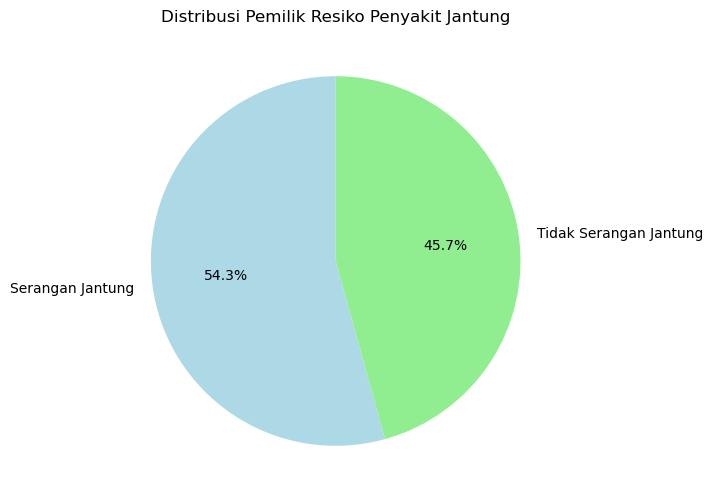

In [9]:
# Rasio Berpotensi dan Tidak 
value_counts = df['target'].value_counts()

# Data untuk pie chart
labels = ['Serangan Jantung', 'Tidak Serangan Jantung']
values = value_counts.values
colors = ['lightblue', 'lightgreen']  # Sesuaikan warna dengan jumlah kategori

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Menambahkan judul
plt.title('Distribusi Pemilik Resiko Penyakit Jantung')

# Menampilkan plot
plt.show()


Data menunjukkan 54 % orang yang ada di list mempunyai potensi untuk penyakit jantung. 

In [10]:
df.groupby('sex')['target'].value_counts()


sex     target
Female  1          72
        0          24
Male    0         114
        1          92
Name: count, dtype: int64

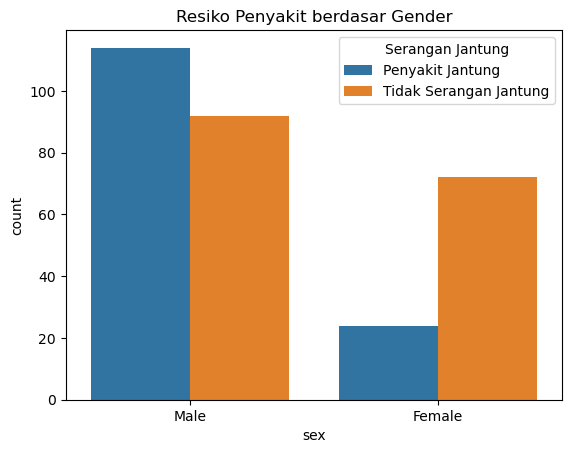

In [11]:
sns.countplot (x='sex' , hue= 'target' , data= df)
plt.title('Resiko Penyakit berdasar Gender')
plt.legend(title='Serangan Jantung', labels=['Penyakit Jantung', 'Tidak Serangan Jantung'])
plt.show()

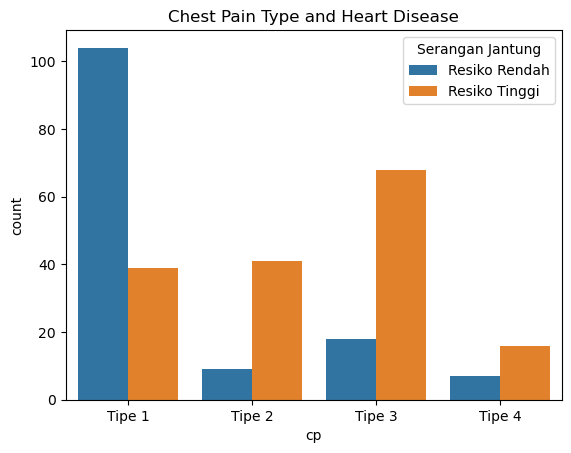

In [12]:
# Countplot for chest pain type with respect to heart disease
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type and Heart Disease')
plt.legend(title='Serangan Jantung', labels=['Resiko Rendah', 'Resiko Tinggi'])
plt.xticks(ticks=[0, 1, 2, 3], labels=['Tipe 1', 'Tipe 2', 'Tipe 3', 'Tipe 4'])
plt.show()

In [13]:
def plot_all_boxplots(df):
    """
    Membuat boxplot untuk setiap kolom numerik dalam DataFrame dengan 4 boxplot per baris.
    """
    # Pilih hanya kolom numerik
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    # Tentukan jumlah kolom per baris
    cols_per_row = 4
    
    # Hitung jumlah baris yang dibutuhkan
    num_rows = (len(numeric_cols) + cols_per_row - 1) // cols_per_row  # Pembulatan ke atas
    
    # Tentukan ukuran figure
    plt.figure(figsize=(cols_per_row * 5, num_rows * 5))  # Ukuran bisa disesuaikan
    
    # Loop melalui setiap kolom numerik dan buat boxplot
    for i, col in enumerate(numeric_cols):
        plt.subplot(num_rows, cols_per_row, i + 1)
        plt.boxplot(df[col].dropna(), vert=True)
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
    
    # Sesuaikan layout agar tidak tumpang tindih
    plt.tight_layout()
    
    # Tampilkan plot
    plt.show()

# Contoh penggunaan:
# df = pd.read_csv('your_data.csv')
# plot_all_boxplots(df)


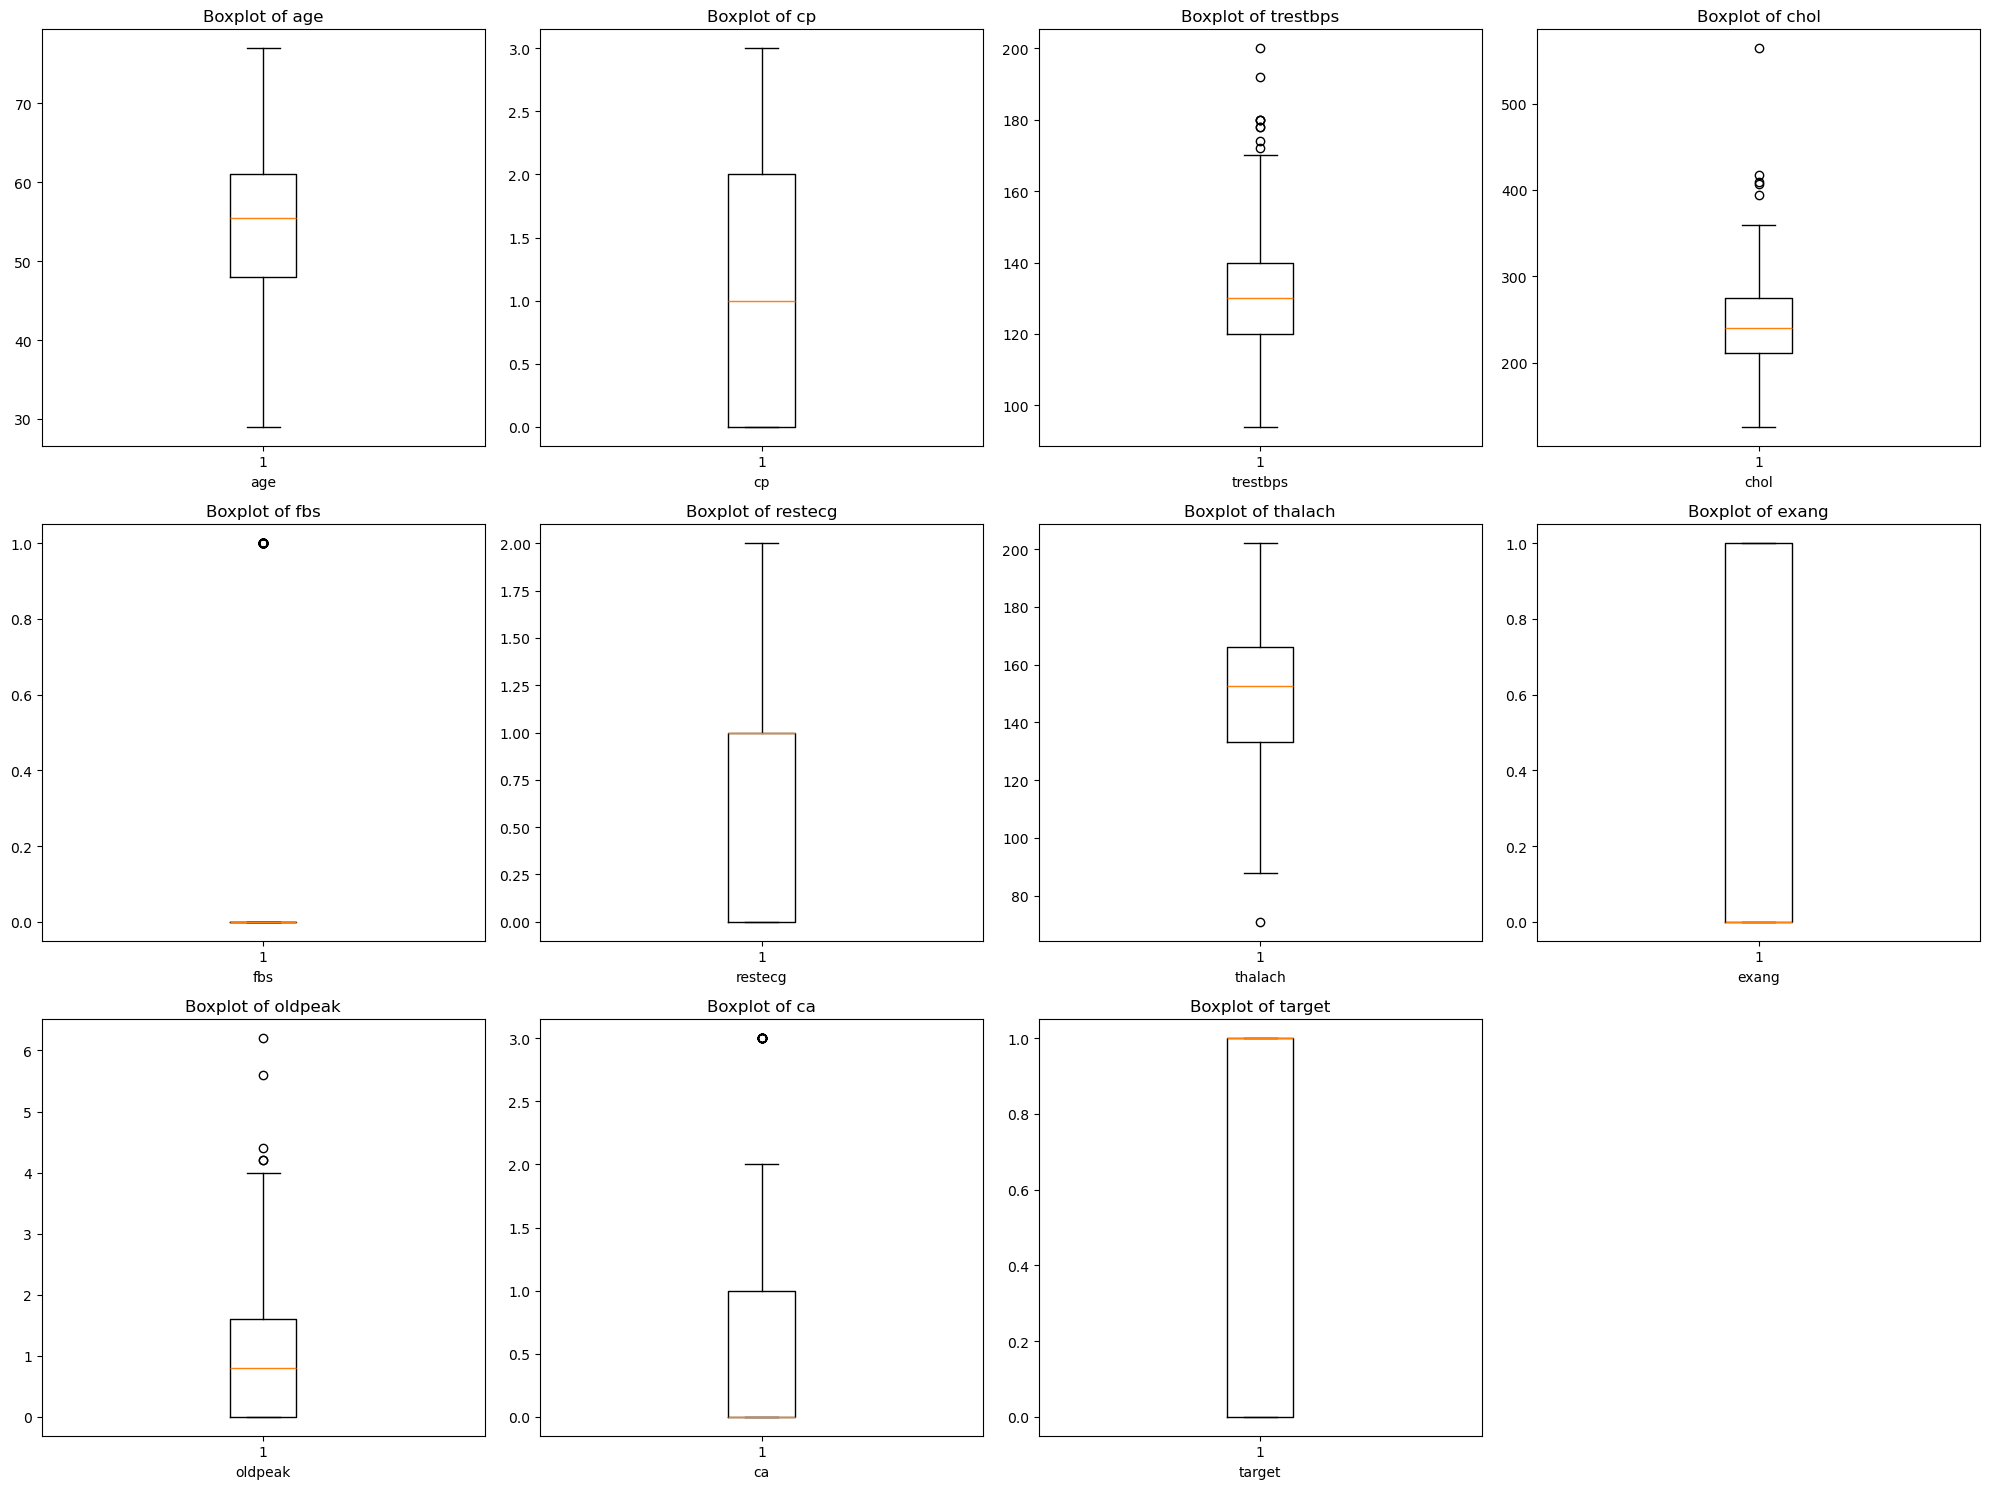

In [14]:
plot_all_boxplots(df)

Masih terlihat outlier pada threst bp,cholestrol, old peak dan ca. Ini nanti akan dihandling di dalam fitur engineering. 

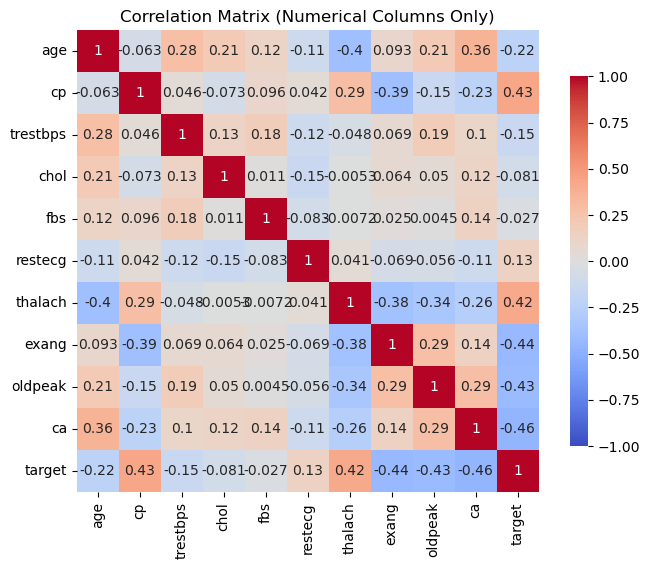

In [15]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Hitung matriks korelasi pada kolom yang bertipe numerik
correlation_matrix = numeric_df.corr()

# Buat diagram korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix (Numerical Columns Only)')
plt.show()

Ini adalah diagram korelasi. Fokus saja ke baris target, titik potong antara target dan age itu merupakan korelasi dari prediksi serangan jantung dan usia. akan di deskripsikan dengan -1 sampai 1 dengan mendekati 0 berarti korelasi hampir lemah dan 0 itu tak adakorelasi begitu pula positif dan negatif. perpotongan antara Usia dan target menunjukkan -22 berarti korelasinya negatif yang mana semakin tinggi usia maka potensi untuk sakit jantung menjadi menurun.  terlihat pada baris target dan perpotongan dengan cp () atau jenis dari sakit nyeri dada. semakin tinggi atau semakin asymptomatic nyeri dada tersebut maka ada kemungkinan bisa menyebabkan serangan jantung. selanjutnya bisa dibaca dan diintrepretasikan di dalam tabel di atas. 

## Fitur Engineering

### Cek Kardinality 



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    object 
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    object 
 11  ca        298 non-null    float64
 12  thal      300 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 35.4+ KB


Kolom Kategorikal yaitu ['sex','cp','fbs','restecg','exang','slope','thal']

In [17]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,sex,2,"[Male, Female]"
1,slope,3,"[Downsloping, Upsloping, Flat]"
2,thal,3,"[Fixed defect, Normal, Reversible defect, nan]"


Kardinality sudah bagus tidak ada data yang kardinalitas tinggi. data banyak yang memiliki n_unique dibawah 5. Lanjut ke Proses Splitting Target dan Fitur 

### Split Target dan Fitur


In [18]:
#splitting antara target dan fitur kolom 
X= df.drop(['target'], axis = 1 )
y = df['target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,Male,3,145,233,1,0,150,0,2.3,Downsloping,0.0,Fixed defect
1,37,Male,2,130,250,0,1,187,0,3.5,Downsloping,0.0,Normal
2,41,Female,1,130,204,0,0,172,0,1.4,Upsloping,0.0,Normal
3,56,Male,1,120,236,0,1,178,0,0.8,Upsloping,0.0,Normal
4,57,Female,0,120,354,0,1,163,1,0.6,Upsloping,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,Flat,0.0,Reversible defect
299,45,Male,3,110,264,0,1,132,0,1.2,Flat,0.0,Reversible defect
300,68,Male,0,144,193,1,1,141,0,3.4,Flat,2.0,Reversible defect
301,57,Male,0,130,131,0,1,115,1,1.2,Flat,1.0,Reversible defect


sudah terbagi antara target dan fitur

In [19]:
# split antara test dan training data 
# penggunaan test size 20% 
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size= 0.2, random_state = 20)

print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (241, 13)
Test Size (61, 13)


### Cek Missing Value

In [20]:
X_train.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          2
thal        1
dtype: int64

In [21]:
X_train[X_train['ca'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
251,43,Male,0,132,247,1,0,143,1,0.1,Flat,NaN,Reversible defect
158,58,Male,1,125,220,0,1,144,0,0.4,Flat,NaN,Reversible defect


Karena semua data itu ada dan tidak terdapat missing value pada data lainnya, kemudian ketika kita lihat kardinality ternyata ada data dengan ca itu 0 maka saya simpulkan ini adalah kesalahan memasukkan data dari manusia maka kita bisa masukkan 0 pada data ini. 

In [22]:
X_train.fillna({'ca': 0},inplace=True)
X_test.fillna({'ca': 0},inplace=True)
X_train.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        1
dtype: int64

In [23]:
X_train[X_train['thal'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
48,53,Female,2,128,216,0,0,115,0,0.0,Upsloping,0.0,NaN


data ini cenderung menunjukkan bahwa individu ini banyak indikator mempengaruhi orang sehat. mislkan pada cholestrol memang lebih dari 200 itu kurang secara kesehatan namun lebih nya tidak banyak jadi bisa dibilang sehat. Namun saya bukan orang kesehatan jadi saya ganti dengan modus saja 

In [24]:
# isi missing value dengan modus
X_train['thal'].fillna(X_train['thal'].mode()[0], inplace=True)
X_test['thal'].fillna(X_test['thal'].mode()[0], inplace=True)

C:\Users\asanm\AppData\Local\Temp\ipykernel_19252\3709654794.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['thal'].fillna(X_train['thal'].mode()[0], inplace=True)
C:\Users\asanm\AppData\Local\Temp\ipykernel_19252\3709654794.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [25]:
X_train.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

###  Split numerical and categorical column

In [26]:
num_col = ['age',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak']

cat_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [27]:
X_train_num = X_train[num_col]
X_test_num = X_test[num_col]

X_train_cat = X_train[cat_col]
X_test_cat = X_test[cat_col]

In [28]:
cat_col_n = ['sex','slope','thal','exang']
cat_col_o = ['cp','fbs','restecg','ca']

In [29]:
X_train_cat_o = X_train[cat_col_o]
X_test_cat_o = X_test[cat_col_o]

X_train_cat_n = X_train[cat_col_n]
X_test_cat_n = X_test[cat_col_n]

### Feature Selection

In [30]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,sex,ada korelasi
1,cp,ada korelasi
2,fbs,ga ada korelasi
3,restecg,ada korelasi
4,exang,ada korelasi
5,slope,ada korelasi
6,ca,ada korelasi
7,thal,ada korelasi


In [31]:
X_test_cat_o.drop('fbs',axis=1,inplace=True)
X_train_cat_o.drop('fbs',axis=1,inplace=True)
X_train_cat_o.columns

C:\Users\asanm\AppData\Local\Temp\ipykernel_19252\1032277820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_o.drop('fbs',axis=1,inplace=True)
C:\Users\asanm\AppData\Local\Temp\ipykernel_19252\1032277820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_o.drop('fbs',axis=1,inplace=True)


Index(['cp', 'restecg', 'ca'], dtype='object')

In [32]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = pearsonr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,age,ada korelasi
1,trestbps,ada korelasi
2,chol,ga ada korelasi
3,thalach,ada korelasi
4,oldpeak,ada korelasi


In [33]:
X_train_num.drop('chol',axis=1,inplace=True)
X_test_num.drop('chol',axis=1,inplace=True)

C:\Users\asanm\AppData\Local\Temp\ipykernel_19252\2494088310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_num.drop('chol',axis=1,inplace=True)
C:\Users\asanm\AppData\Local\Temp\ipykernel_19252\2494088310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_num.drop('chol',axis=1,inplace=True)


In [34]:
X_train_num.columns

Index(['age', 'trestbps', 'thalach', 'oldpeak'], dtype='object')

### Scaling 

In [35]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.65116279, 0.30232558, 0.22764228, 0.29032258],
       [0.6744186 , 0.59302326, 0.64227642, 0.37096774],
       [0.48837209, 1.        , 0.37398374, 0.5483871 ],
       [0.13953488, 0.53488372, 0.8699187 , 0.22580645],
       [0.55813953, 0.88372093, 0.6097561 , 0.4516129 ],
       [0.60465116, 0.53488372, 0.80487805, 0.19354839],
       [0.62790698, 0.65116279, 0.53658537, 0.16129032],
       [0.46511628, 0.36046512, 0.65853659, 0.08064516],
       [0.53488372, 0.53488372, 0.42276423, 0.03225806],
       [0.18604651, 0.30232558, 0.7398374 , 0.        ],
       [0.30232558, 0.1627907 , 0.65853659, 0.        ],
       [0.18604651, 0.09302326, 0.41463415, 0.09677419],
       [0.74418605, 0.76744186, 0.39837398, 0.        ],
       [0.62790698, 0.30232558, 0.56097561, 0.58064516],
       [0.37209302, 0.40697674, 0.74796748, 0.        ],
       [0.69767442, 0.41860465, 0.41463415, 0.32258065],
       [0.76744186, 0.30232558, 0.47154472, 0.41935484],
       [0.37209302, 0.58139535,

In [36]:
encoder_n = OneHotEncoder()
encoder_n.fit(X_train_cat_n)

OneHotEncoder()

In [37]:
X_train_encoded_n = encoder_n.transform(X_train_cat_n).toarray()
X_test_encoded_n = encoder_n.transform(X_test_cat_n).toarray()
X_test_encoded_n

array([[1., 0., 1., 0., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 

In [38]:
# cek dulu untuk menentukan penggantian 
pd.set_option('display.max_colwidth', None)

cat_cols = list(X_train_cat_o.columns)

listItem = []
for col in cat_cols:
  listItem.append([col, X_train_cat_o[col].nunique(), X_train_cat_o[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,cp,4,"[0, 3, 2, 1]"
1,restecg,3,"[1, 0, 2]"
2,ca,4,"[2.0, 0.0, 1.0, 3.0]"


In [39]:
encoder_o = OrdinalEncoder(categories=[[0, 1, 2,3,],[0,1,2],[0,1,2,3]])
encoder_o.fit(X_train_cat_o)

OrdinalEncoder(categories=[[0, 1, 2, 3], [0, 1, 2], [0, 1, 2, 3]])

In [40]:
X_train_encoded_o = encoder_o.transform(X_train_cat_o)
X_test_encoded_o = encoder_o.transform(X_test_cat_o)

### Concat

In [41]:
X_train_final = np.concatenate(
    [X_train_num_scaled, X_train_encoded_o, X_train_encoded_n], axis=1)
X_test_final = np.concatenate(
    [X_test_num_scaled, X_test_encoded_o, X_test_encoded_n], axis=1)

### Logistic Regresion

In [54]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [56]:
164/(138+164) *100


54.3046357615894

Why Logreg? Data Balance karena masih di range 50 banding 50 an. dataset yang relatif lebih kecil. Model yang cepat dan efisien

In [42]:
# Train using Logistic Regression
from sklearn.linear_model import LogisticRegression

In [43]:
model_logreg = LogisticRegression(penalty='l2', C=1.0, random_state=12)

In [44]:
model_logreg.fit(X_train_final, y_train)

LogisticRegression(random_state=12)

In [45]:
y_train_pred = model_logreg.predict(X_train_final)
y_test_pred = model_logreg.predict(X_test_final)


In [46]:
# Recall untuk training set
print('Recall - Train Set : ', recall_score(y_train, y_train_pred))

# Recall untuk test set
print('Recall - Test Set  : ', recall_score(y_test, y_test_pred))


Recall - Train Set :  0.8888888888888888
Recall - Test Set  :  0.8421052631578947


In [51]:
from sklearn.model_selection import cross_val_score

f1_train_cross_val = cross_val_score(model_logreg,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', f1_train_cross_val)
print('Recall - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('Recall - Std - Cross Validation  : ', f1_train_cross_val.std())
print('Recall - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

Recall - All - Cross Validation  :  [0.9047619  0.76190476 0.83333333]
Recall - Mean - Cross Validation :  0.8333333333333334
Recall - Std - Cross Validation  :  0.05832118435198045
Recall - Range of Test-Set       :  0.775012148981353 - 0.8916545176853138


Recall Score - Test Set   :  0.8421052631578947 

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.96      0.86        23
           1       0.97      0.84      0.90        38

    accuracy                           0.89        61
   macro avg       0.88      0.90      0.88        61
weighted avg       0.90      0.89      0.89        61
 

Confusion Matrix      : 


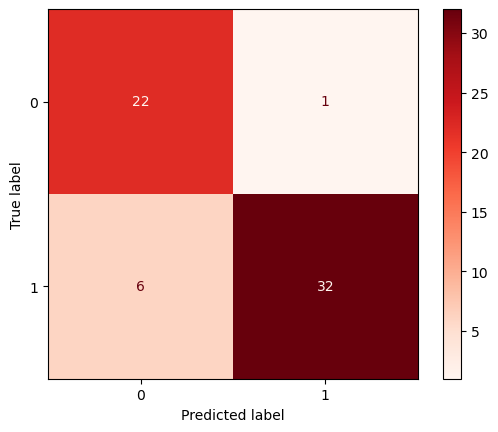

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
y_pred_test = model_logreg.predict(X_test_final)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_logreg, X_test_final, y_test, cmap='Reds'))

In [53]:
all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train),
      'train - recall' : recall_score(y_train, y_pred_train),
      'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - precision' : precision_score(y_test, y_pred_test),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train, y_train_pred, y_test, y_pred_test, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
train - precision,0.829630
train - recall,0.888889
train - accuracy,0.846473
train - f1_score,0.858238
test - precision,0.969697
test - recall,0.842105
test - accuracy_score,0.885246
test - f1_score,0.901408


In [ ]:
# Hyperparameter Tuning : Random Search
from sklearn.model_selection import RandomizedSearchCV

